<a href="https://colab.research.google.com/github/edojatheophilus/Logistic-Regression-Model-for-Diabetes-Prediction/blob/main/Logistic_Regression_Model_for_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve


In [80]:
df = pd.read_csv("/content/diabetes.csv")


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [83]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
# Checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking if there are any categorical columns

In [86]:
# Select columns of object data type (categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    print("Categorical columns found:")
    print(categorical_columns)
else:
    print("No categorical columns found.")

No categorical columns found.


Correlation matrix heatmap to visualize the relationships between features.

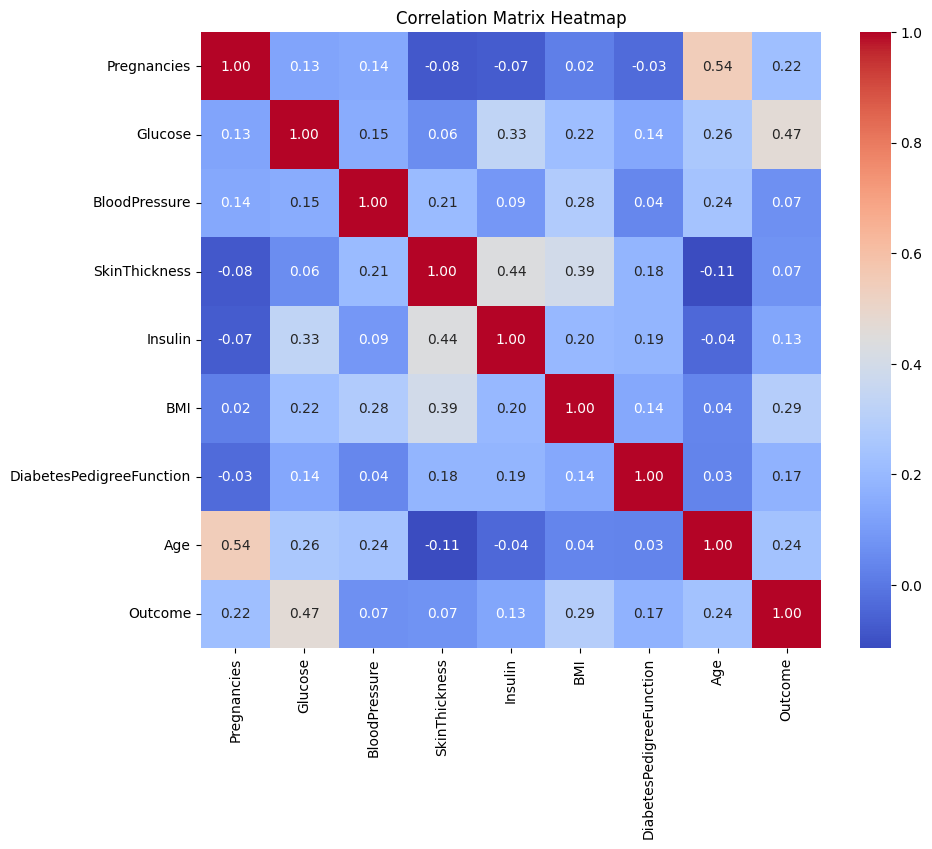

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Box plots to visualize the distribution of features for each class.

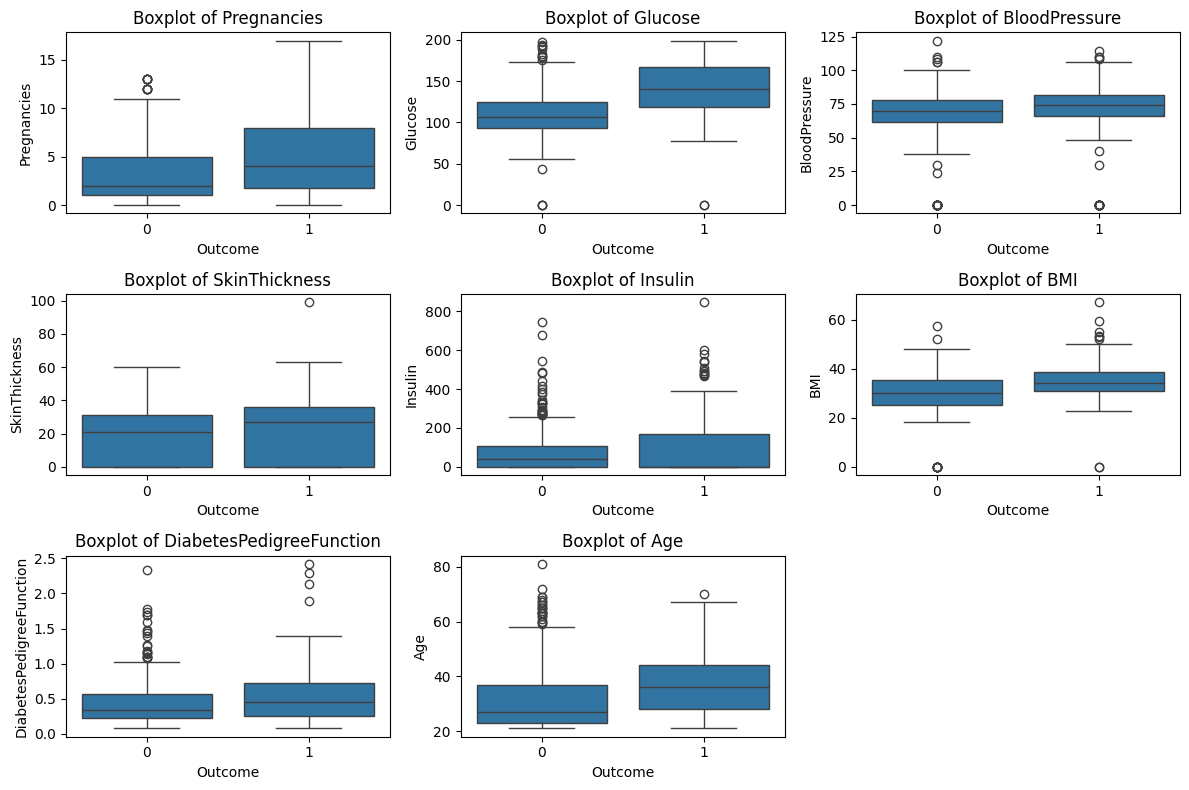

In [88]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


Distribution of the target variable.

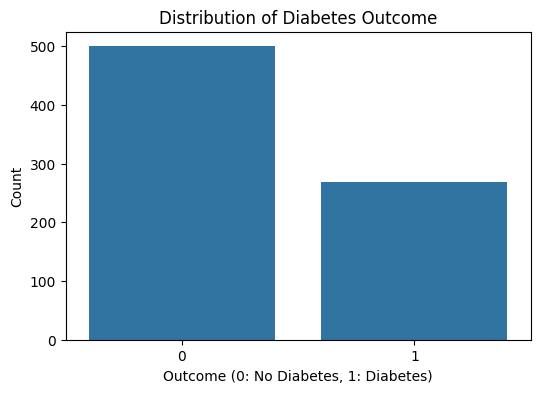

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# Split data into features and target variable

In [90]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

Split the dataset into training and testing sets (e.g., 80% training and 20% testing).

In [91]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Build a Logistic Regression model to predict the likelihood of diabetes based on the features provided.

In [93]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Define feature names
feature_names = X.columns

In [95]:
# Build Logistic Regression model
log_reg_model = LogisticRegression()

In [96]:
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [97]:
log_reg_model.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [98]:
# Predict on test set
y_pred = log_reg_model.predict(X_test_scaled)

In [99]:
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]

Evaluate the model using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [100]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [101]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8146923783287419


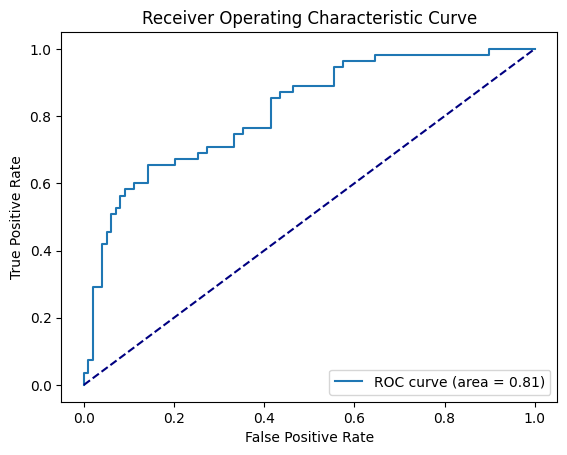

In [103]:
# ROC Curve
plt.plot(*roc_curve(y_test, y_pred_proba)[:2], label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


Interpret the model coefficients to understand the impact of different features on the likelihood of diabetes.

In [104]:
# Interpretting the model coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg_model.coef_[0]
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                    Feature  Coefficient
0               Pregnancies     0.212558
1                   Glucose     1.071132
2             BloodPressure    -0.247842
3             SkinThickness     0.045697
4                   Insulin    -0.200827
5                       BMI     0.778152
6  DiabetesPedigreeFunction     0.230607
7                       Age     0.421002


## summary

Glucose and BMI is positively associated with diabetes risk - Higher values increase likelihood.
Blood Pressure and Insulin is inversely related to diabetes risk - Higher values decrease likelihood.

The Model effectively predicts diabetes risk, Glucose and BMI crucial predictors while Blood Pressure and Insulin show inverse correlation.